In [1]:
import diff_viz
from diff_viz import data_loading
from diff_viz.feature_distribution_plots import feature_violin_plot
import pandas as pd
from diff_viz.msd import msd_viz
import diff_classifier
import diff_classifier.heatmaps as hm
import numpy as np
from os import getcwd, chdir
import diff_predictor
from diff_predictor import data_process

In [2]:
data_path = '/Users/nelsschimek/Documents/nancelab/diff_viz/diff_viz/tests/testing_data/'

In [3]:
p14_file = 'features_P14_40nm_s1_v1.csv'
p35_file = 'features_P35_brain_2_slice_1_vid_1.csv'
p70_file = 'features_P70_40nm_s1_v3.csv'

In [4]:
ecm = data_process.generate_fullstats(data_path, [p14_file, p35_file, p70_file], ['P14', 'P35', 'P70'], 'age')
ecm

Adding file features_P14_40nm_s1_v1.csv size: (793, 91)
Adding file features_P35_brain_2_slice_1_vid_1.csv size: (416, 91)
Adding file features_P70_40nm_s1_v3.csv size: (25, 67)


/Users/nelsschimek/anaconda3/envs/streamlit_diff_viz/lib/python3.9/site-packages/diff_predictor/data_process.py:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fstats_tot = fstats_tot.append(fstats, ignore_index=True)
/Users/nelsschimek/anaconda3/envs/streamlit_diff_viz/lib/python3.9/site-packages/diff_predictor/data_process.py:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fstats_tot = fstats_tot.append(fstats, ignore_index=True)


,Track_ID,alpha,D_fit,kurtosis,asymmetry1,asymmetry2,asymmetry3,AR,elongation,boundedness,...,Std convex_hull_norm,Mean dist_tot,Std dist_tot,Mean dist_net,Std dist_net,Mean progression,Std progression,age,Filename,Video Number
0,0.0,1.458918e-01,115.910645,3.051675,0.744942,0.271071,0.179650,1.287207,0.223124,0.157897,...,0.0,25621.753218,10363.797033,1800.021676,64.057425,0.080031,0.025167,P14,features_P14_40nm_s1_v1.csv,0
1,1.0,2.193719e+00,1.611728,3.180184,0.851672,0.200292,0.250967,2.605750,0.616233,0.030720,...,0.0,26835.693671,8364.829289,2312.473896,61.022111,0.093691,0.024171,P14,features_P14_40nm_s1_v1.csv,0
2,2.0,1.649381e+00,12.301497,1.654691,0.989301,0.051857,0.521313,3.210672,0.688539,0.041548,...,0.0,24169.173272,7667.671923,1991.842371,76.548932,0.090450,0.025825,P14,features_P14_40nm_s1_v1.csv,0
3,3.0,7.561725e-01,50.106737,2.428506,0.990430,0.049030,0.529145,3.600695,0.722276,0.128690,...,0.0,24169.173272,7667.671923,1991.842371,76.548932,0.090450,0.025825,P14,features_P14_40nm_s1_v1.csv,0
4,4.0,2.153309e+00,3.674387,2.894523,0.996028,0.031544,0.581089,4.677014,0.786188,0.154286,...,0.0,25686.973833,12240.490368,2002.856919,108.115520,0.091822,0.030371,P14,features_P14_40nm_s1_v1.csv,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1229,20.0,8.235284e-02,3.233085,1.831472,0.978860,0.073086,0.466907,2.817264,0.645046,0.111742,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,P70,features_P70_40nm_s1_v3.csv,2
1230,21.0,8.314760e-02,5.130831,4.643672,0.663740,0.319545,0.142670,1.468787,0.319166,0.105139,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,P70,features_P70_40nm_s1_v3.csv,2
1231,22.0,4.528161e-08,12.927095,3.933251,0.977505,0.075419,0.461365,4.419778,0.773744,0.073549,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,P70,features_P70_40nm_s1_v3.csv,2
1232,23.0,1.601281e+00,0.842433,3.609991,0.852271,0.199854,0.251489,2.528793,0.604554,0.043247,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,P70,features_P70_40nm_s1_v3.csv,2


In [5]:
ecm = data_loading.clean_mpt_data(ecm, 'default', 'age')

In [15]:
ecm = ecm[ecm['Deff1']<20]

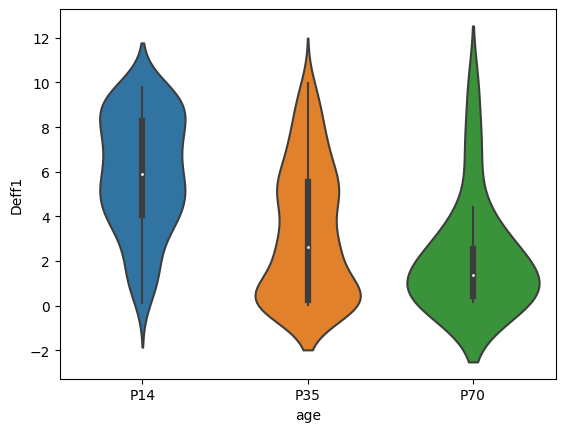

In [16]:
feature_violin_plot(ecm, 'Deff1', 'age')